In [85]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


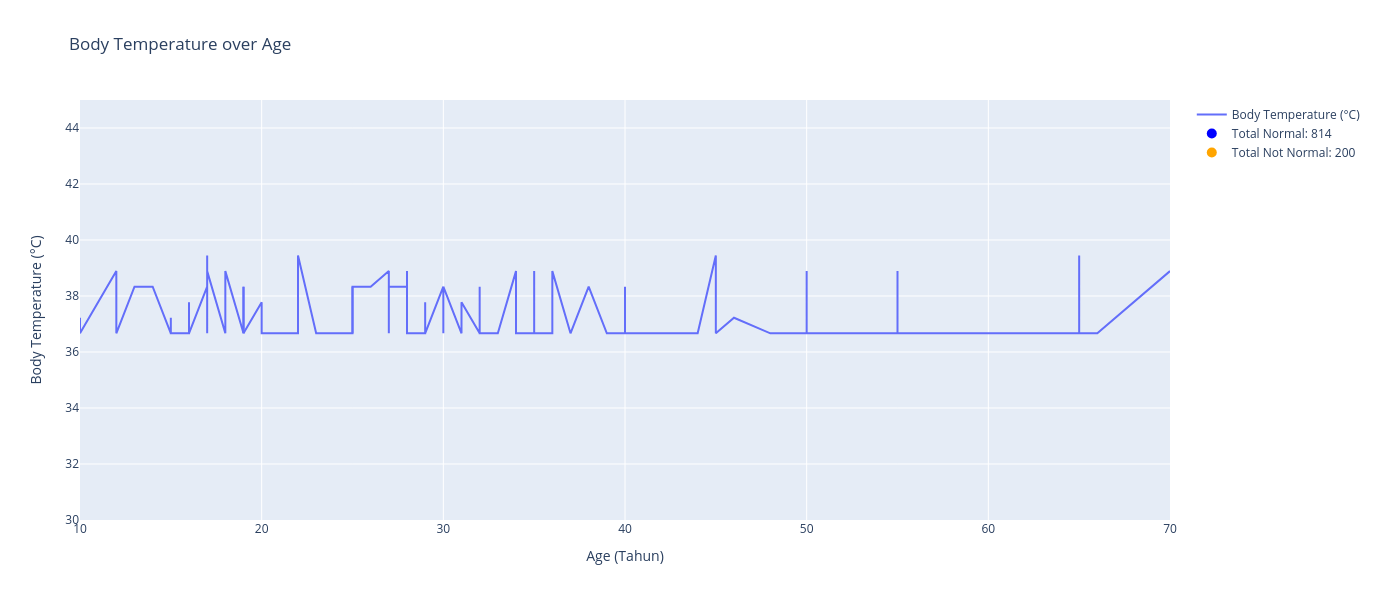

In [30]:
import pandas as pd
import plotly.graph_objs as go

data = pd.read_excel('data/data_kesehatan.xlsx')
data = data.sort_values(by='Age')

# Defining the 'normal' temperature range (e.g., 36.5 to 37.5 degrees Celsius)
normal_temp_range = (36.5, 37.5)

# Determining if each temperature is normal or not and creating a new column for it
data['TempStatus'] = data['body Temp (celcius)'].apply(lambda x: 'normal' if normal_temp_range[0] <= x <= normal_temp_range[1] else 'not normal')

# Group by 'TempStatus' and count the occurrences
temp_status_counts = data['TempStatus'].value_counts()

# Mengambil kolom 'Age' (umur) dari DataFrame dan menyimpannya dalam variabel 'x'
x = data['Age']
y = data['body Temp (celcius)']

fig = go.Figure()

# Trace for Body Temperature
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Body Temperature (°C)'))

# Adding dummy traces for the legend, with mode='none' so they don't show up on the graph
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {temp_status_counts["normal"]}'
))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {temp_status_counts["not normal"]}'
))

# Mengatur layout grafik, termasuk judul, label sumbu, lebar, dan tinggi
fig.update_layout(
    title='Body Temperature over Age',
    xaxis_title='Age (Tahun)',
    yaxis_title='Body Temperature (°C)',
    autosize=True,
    height=600
)

fig.update_yaxes(
    range=[30, 45]
)

# Menampilkan grafik yang telah dibuat
fig.show()


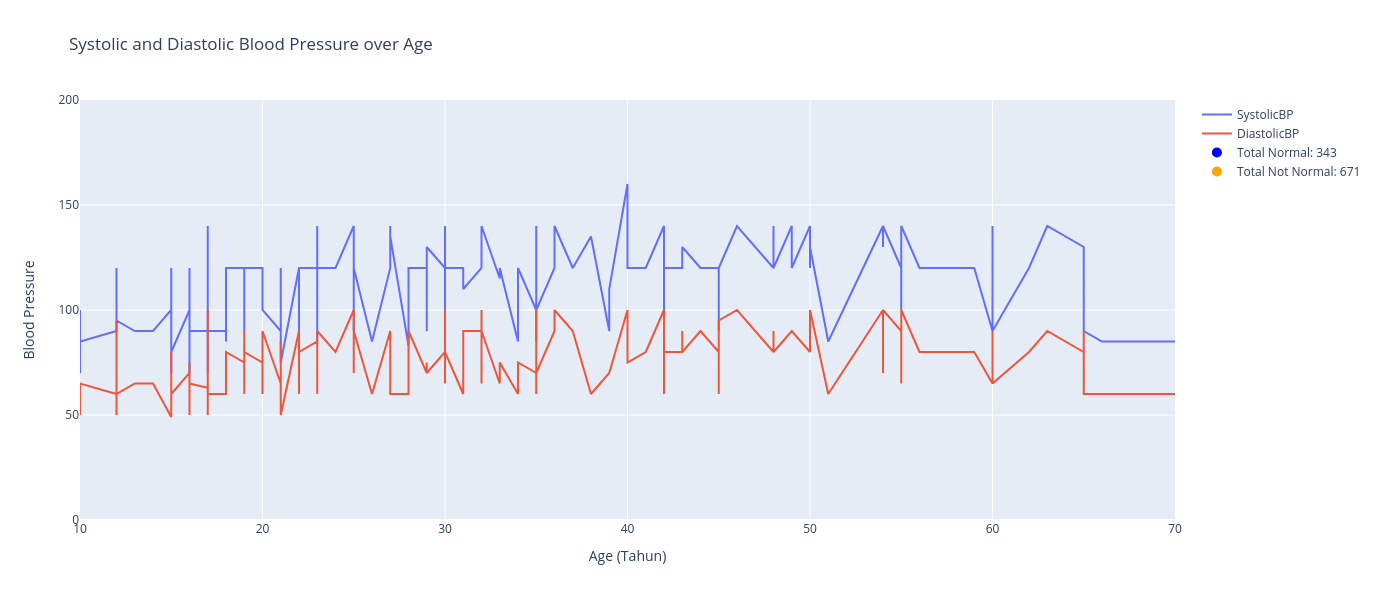

In [31]:
# Mengimpor pustaka Pandas dan memberi alias pd
import pandas as pd

# Mengimpor pustaka Plotly's graph_objs dan memberi alias go
import plotly.graph_objs as go

# Membaca data dari file Excel 'data_kesehatan.xlsx' dan menyimpannya dalam objek DataFrame yang disebut 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan DataFrame 'data' berdasarkan kolom 'Age' (umur)
data = data.sort_values(by='Age')

# Function to determine if blood pressure is normal or not
def is_bp_normal(systolic, diastolic):
    return 'normal' if systolic < 120 and diastolic < 80 else 'not normal'

# Adding a new column 'BPStatus' to the DataFrame
data['BPStatus'] = data.apply(lambda row: is_bp_normal(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Count the normal and not normal occurrences
bp_status_counts = data['BPStatus'].value_counts()

# Mengambil kolom 'Age' (umur) dari DataFrame dan menyimpannya dalam variabel 'x'
x = data['Age']

# Mengambil kolom 'SystolicBP' (tekanan darah sistolik) dari DataFrame dan menyimpannya dalam variabel 'systolic_bp'
systolic_bp = data['SystolicBP']

# Mengambil kolom 'DiastolicBP' (tekanan darah diastolik) dari DataFrame dan menyimpannya dalam variabel 'diastolic_bp'
diastolic_bp = data['DiastolicBP']

# Membuat objek grafik kosong menggunakan Plotly's Figure
fig = go.Figure()

# Menambahkan trace berupa garis pada grafik untuk 'SystolicBP' dengan data 'x' (umur) dan 'systolic_bp' sebagai sumbu Y
fig.add_trace(go.Scatter(x=x, y=systolic_bp, mode='lines', name='SystolicBP'))

# Menambahkan trace berupa garis pada grafik untuk 'DiastolicBP' dengan data 'x' (umur) dan 'diastolic_bp' sebagai sumbu Y
# Berbeda dengan 'SystolicBP', 'DiastolicBP' menggunakan gaya garis yang berbeda
fig.add_trace(go.Scatter(x=x, y=diastolic_bp, mode='lines', name='DiastolicBP'))

# Adding dummy traces for the legend
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {bp_status_counts.get("normal", 0)}'  # Get the count of 'normal' or 0 if not present
))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {bp_status_counts.get("not normal", 0)}'  # Get the count of 'not normal' or 0 if not present
))

# Mengatur layout grafik, termasuk judul, label sumbu, lebar, dan tinggi
fig.update_layout(
    title='Systolic and Diastolic Blood Pressure over Age',
    xaxis_title='Age (Tahun)',
    yaxis_title='Blood Pressure',
    autosize=True,
    height=600
)

fig.update_yaxes(
    range=[0, 200]
)

# Menampilkan grafik yang telah dibuat
fig.show()


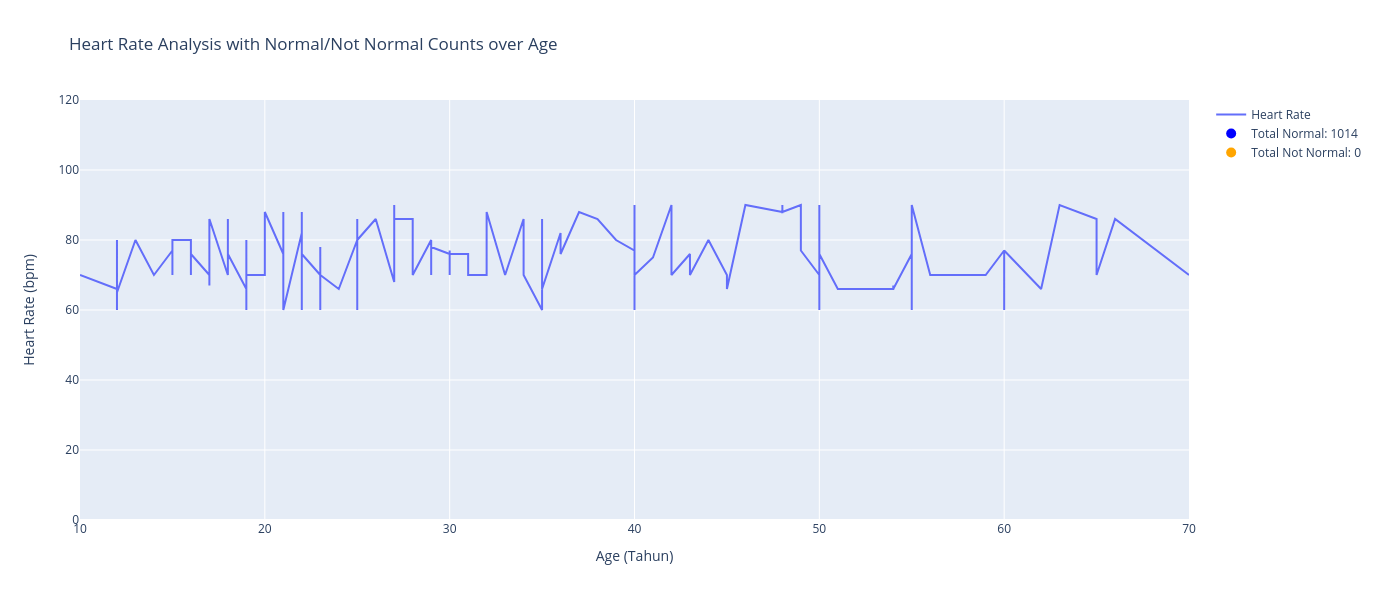

In [33]:
# Mengimpor pustaka Pandas dan memberi alias pd
import pandas as pd

# Mengimpor pustaka Plotly's graph_objs dan memberi alias go
import plotly.graph_objs as go

# Membaca data dari file Excel 'data_kesehatan.xlsx' dan menyimpannya dalam objek DataFrame yang disebut 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')

# Mengurutkan DataFrame 'data' berdasarkan kolom 'Age' (umur)
data = data.sort_values(by='Age')

# Defining the 'normal' heart rate range
normal_hr_range = (60, 100)

# Determining if each heart rate is normal or not and creating a new column for it
data['HRStatus'] = data['HeartRate'].apply(lambda x: 'normal' if normal_hr_range[0] <= x <= normal_hr_range[1] else 'not normal')

# Group by 'HRStatus' and count the occurrences
hr_status_counts = data['HRStatus'].value_counts()

# Mengambil kolom 'Age' (umur) dari DataFrame dan menyimpannya dalam variabel 'x'
x = data['Age']

# Mengambil kolom 'HeartRate' (detak jantung) dari DataFrame dan menyimpannya dalam variabel 'y'
y = data['HeartRate']

# Membuat objek grafik kosong menggunakan Plotly's Figure
fig = go.Figure()

# Menambahkan trace berupa garis pada grafik untuk 'HeartRate' dengan data 'x' (umur) dan 'y' sebagai sumbu Y
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Heart Rate'))

# Adding dummy traces for the legend with checks for key existence
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {hr_status_counts.get("normal", 0)}'  # Using .get() to avoid KeyError
))

# Adjusting the plot to include the 'Total Not Normal' count even if it is 0
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {hr_status_counts.get("not normal", 0)}'  # Using .get() with default value 0
))

# Updating the layout
fig.update_layout(
    title='Heart Rate Analysis with Normal/Not Normal Counts over Age',
    xaxis_title='Age (Tahun)',
    yaxis_title='Heart Rate (bpm)',
    yaxis2=dict(
        title='Total Counts',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    autosize=True,
    height=600
)

fig.update_yaxes(
    range=[0, 120]
)

# Menampilkan grafik yang telah dibuat
fig.show()


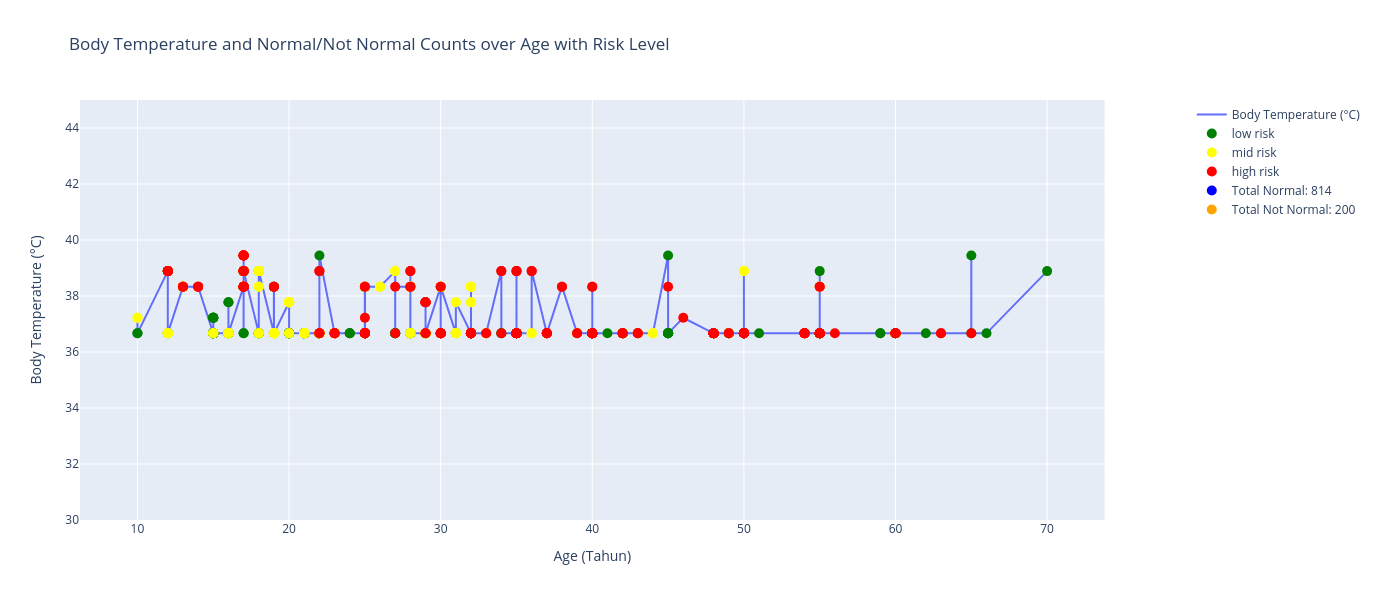

In [34]:
# Importing required libraries
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Reading data from Excel file and storing it in a DataFrame 'data'
data = pd.read_excel('data/data_kesehatan.xlsx')

# Sorting the DataFrame 'data' based on the 'Age' column
data = data.sort_values(by='Age')

# Defining the 'normal' temperature range (e.g., 36.5 to 37.5 degrees Celsius)
normal_temp_range = (36.5, 37.5)

# Determining if each temperature is normal or not and creating a new column for it
data['TempStatus'] = data['body Temp (celcius)'].apply(lambda x: 'normal' if normal_temp_range[0] <= x <= normal_temp_range[1] else 'not normal')

# Group by 'TempStatus' and count the occurrences
temp_status_counts = data['TempStatus'].value_counts()

# Extracting 'Age', 'body Temp (celcius)', and 'RiskLevel' from the data
x = data['Age']
y = data['body Temp (celcius)']
risk_levels = data['RiskLevel']

# Defining color mapping for risk levels
color_mapping = {'low risk': 'green', 'mid risk': 'yellow', 'high risk': 'red'}

# Creating a subplot figure with a secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding a line trace for body temperature
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Body Temperature (°C)'), secondary_y=False)

# Adding separate traces for each risk level
for risk_level, color in color_mapping.items():
    x_risk = [x[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    y_risk = [y[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    hover_text = [f"Age: {x[i]}, Temp: {y[i]}°C, Risk Level: {risk_levels[i]}" for i in range(len(x)) if risk_levels[i] == risk_level]
    
    fig.add_trace(go.Scatter(
        x=x_risk,
        y=y_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=risk_level,
        hovertext=hover_text
    ), secondary_y=False)

# Adding dummy traces for the legend, with mode='none' so they don't show up on the graph
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {temp_status_counts["normal"]}'
))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {temp_status_counts["not normal"]}'
))

# Updating the layout to include secondary y-axis title and making the grid for secondary y-axis invisible
fig.update_layout(
    title='Body Temperature and Normal/Not Normal Counts over Age with Risk Level',
    xaxis_title='Age (Tahun)',
    yaxis_title='Body Temperature (°C)',
    yaxis2=dict(
        title='Total Counts',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    autosize=True,
    height=600,
)

# Update the y-axis configuration to include these new tick values and texts and the new range
fig.update_yaxes(
    range=[30, 45]
)

# Displaying the plot
fig.show()


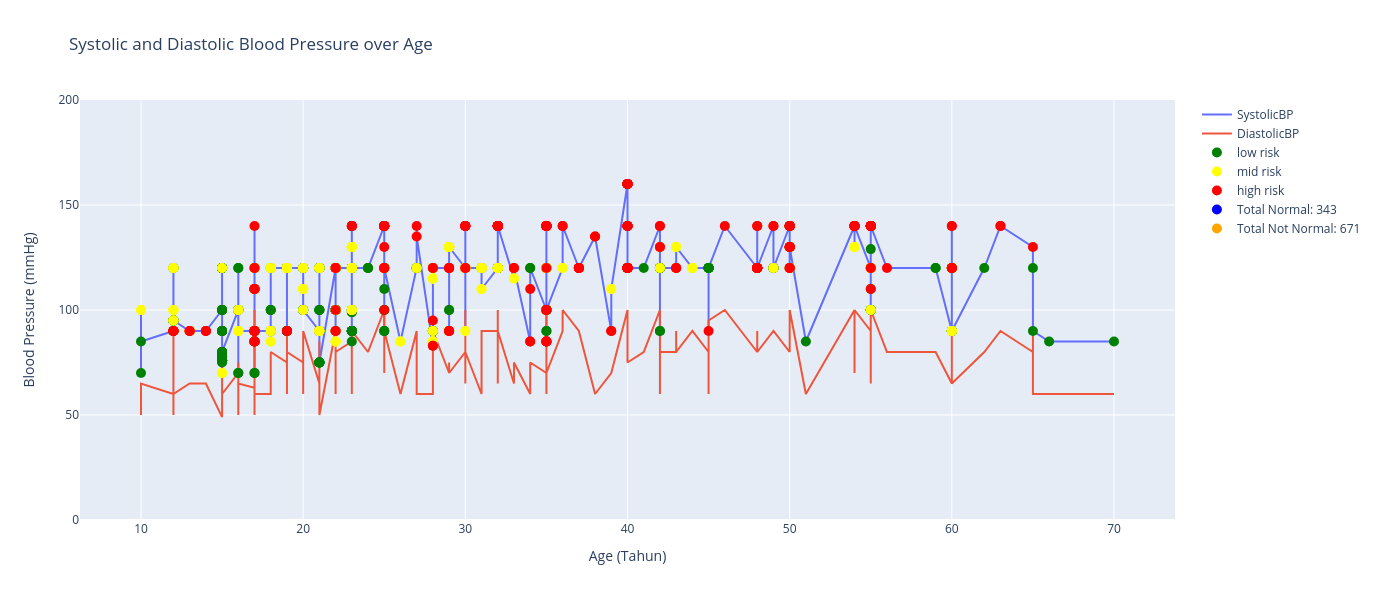

In [35]:
import pandas as pd
import plotly.graph_objs as go

# Reading data from the Excel file
data = pd.read_excel('data/data_kesehatan.xlsx')
data = data.sort_values(by='Age')

# Function to determine if blood pressure is normal or not
def is_bp_normal(systolic, diastolic):
    return 'normal' if systolic < 120 and diastolic < 80 else 'not normal'

# Adding a new column 'BPStatus' to the DataFrame
data['BPStatus'] = data.apply(lambda row: is_bp_normal(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Count the normal and not normal occurrences
bp_status_counts = data['BPStatus'].value_counts()

# Extracting columns for plotting
x = data['Age']
systolic_bp = data['SystolicBP']
diastolic_bp = data['DiastolicBP']

# Create a Plotly figure
fig = go.Figure()

# Add traces for Systolic and Diastolic Blood Pressure
fig.add_trace(go.Scatter(x=x, y=systolic_bp, mode='lines', name='SystolicBP'))
fig.add_trace(go.Scatter(x=x, y=diastolic_bp, mode='lines', name='DiastolicBP'))

# Membuat titik data terpisah untuk setiap tingkat risiko
for risk_level, color in color_mapping.items():
    # Mengelompokkan data berdasarkan tingkat risiko
    x_risk = [x[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    systolic_risk = [systolic_bp[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    diastolic_risk = [diastolic_bp[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    
    # Membuat teks hover yang berisi informasi umur, tekanan darah sistolik, tekanan darah diastolik, dan tingkat risiko untuk setiap data dalam kelompok tersebut
    hover_text = [f"Age: {x[i]}, SystolicBP: {systolic_bp[i]}, DiastolicBP: {diastolic_bp[i]}, Risk Level: {risk_levels[i]}" for i in range(len(x)) if risk_levels[i] == risk_level]

    # Menambahkan trace berupa marker dengan warna, ukuran, nama, dan teks hover yang sesuai
    fig.add_trace(go.Scatter(
        x=x_risk,
        y=systolic_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=risk_level,
        hovertext=hover_text
    ))

# Adding dummy traces for the legend
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {bp_status_counts.get("normal", 0)}'  # Get the count of 'normal' or 0 if not present
))

fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {bp_status_counts.get("not normal", 0)}'  # Get the count of 'not normal' or 0 if not present
))

# Update the layout
fig.update_layout(
    title='Systolic and Diastolic Blood Pressure over Age',
    xaxis_title='Age (Tahun)',
    yaxis_title='Blood Pressure (mmHg)',
    height=600
)

fig.update_yaxes(
    range=[0, 200]
)

# Display the plot
fig.show()


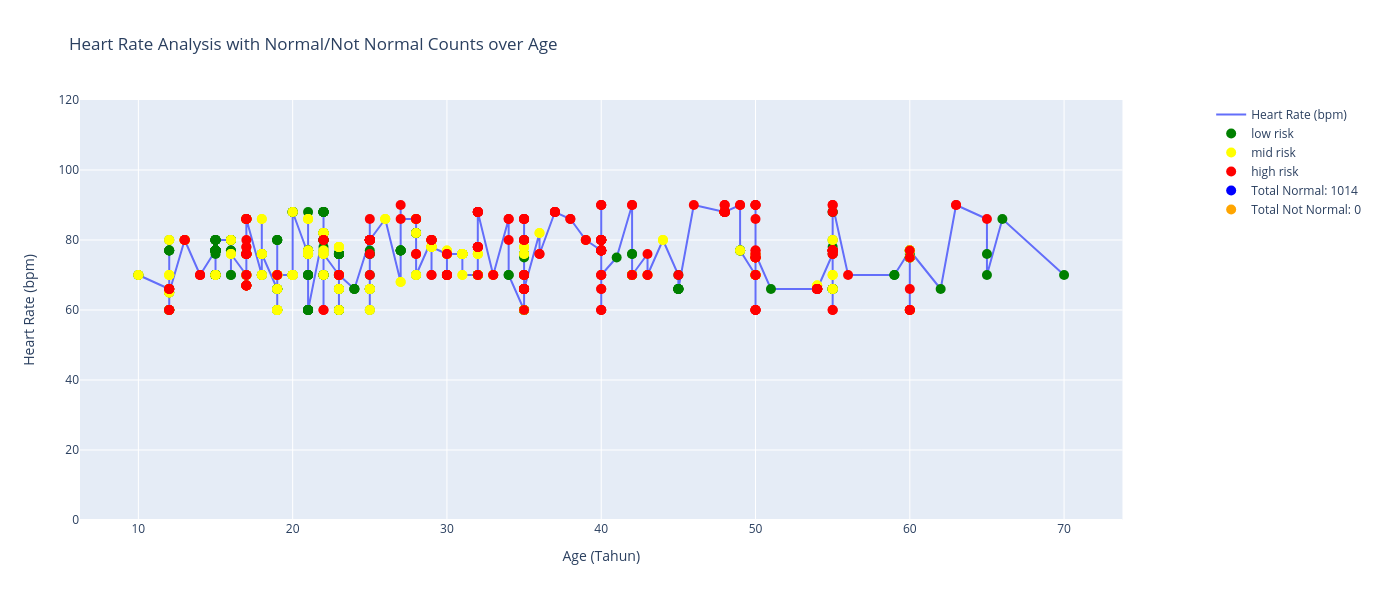

In [37]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Reading data from the Excel file
data = pd.read_excel('data/data_kesehatan_copy.xlsx')
data = data.sort_values(by='Age')

# Defining the 'normal' heart rate range
normal_hr_range = (60, 100)

# Determining if each heart rate is normal or not and creating a new column for it
data['HRStatus'] = data['HeartRate'].apply(lambda x: 'normal' if normal_hr_range[0] <= x <= normal_hr_range[1] else 'not normal')

# Group by 'HRStatus' and count the occurrences
hr_status_counts = data['HRStatus'].value_counts()

# Extracting 'Age', 'HeartRate', and 'RiskLevel' from the data
x = data['Age']
y = data['HeartRate']
risk_levels = data['RiskLevel']

# Defining color mapping for risk levels
color_mapping = {'low risk': 'green', 'mid risk': 'yellow', 'high risk': 'red'}

# Creating a subplot figure with a secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding a line trace for heart rate
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Heart Rate (bpm)'), secondary_y=False)

# Adding separate traces for each risk level
for risk_level, color in color_mapping.items():
    x_risk = [x[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    y_risk = [y[i] for i in range(len(x)) if risk_levels[i] == risk_level]
    hover_text = [f"Age: {x[i]}, Heart Rate: {y[i]} bpm, Risk Level: {risk_levels[i]}" for i in range(len(x)) if risk_levels[i] == risk_level]
    
    fig.add_trace(go.Scatter(
        x=x_risk,
        y=y_risk,
        mode='markers',
        marker=dict(color=color, size=10),
        name=risk_level,
        hovertext=hover_text
    ), secondary_y=False)

# Adding dummy traces for the legend with checks for key existence
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name=f'Total Normal: {hr_status_counts.get("normal", 0)}'  # Using .get() to avoid KeyError
))

# Adjusting the plot to include the 'Total Not Normal' count even if it is 0
fig.add_trace(go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(size=10, color='orange'),
    name=f'Total Not Normal: {hr_status_counts.get("not normal", 0)}'  # Using .get() with default value 0
))

# Updating the layout
fig.update_layout(
    title='Heart Rate Analysis with Normal/Not Normal Counts over Age',
    xaxis_title='Age (Tahun)',
    yaxis_title='Heart Rate (bpm)',
    yaxis2=dict(
        title='Total Counts',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    autosize=True,
    height=600
)

fig.update_yaxes(
    range=[0, 120]
)

# Displaying the plot
fig.show()
